## 파이토치 패키지의 기본 구성

- torch.autograd
    - 자동 미분을 위한 함수, 콘텍스트 매니저, 'Function'클래스 등 포함
    - 콘텍스트 매니저: 자동 미분의 on/off 제어
    - 'Function' 클래스: 자체 미분 가능 함수를 정의할 때 사용
    
- torch.nn
    - 데이터 구조, 레이어 등
    - 레이어(RNN, LSTM, ..), 활성함수(ReLU, ..), 손실함수(MSELoss, ...)

- torch.optim
    - SGD를 중심으로 한 파라미터 최적화 알고리즘
    - SGD: 확률적 경사 하강법

- torch.utils.data
    - SGD 반복 연산을 실행할 때 사용하는 미니 배치용 유틸리티 함수
    
- torch.onnx
    - ONNX(Open Neural Network Exchange)의 포맷으로 모델을 export할 때 사용
    - ONNX: 서로 다른 딥러닝 프레임워크 간에 모델을 공유할 때 사용하는 포맷

## 텐서

### 벡터, 행렬, 텐서

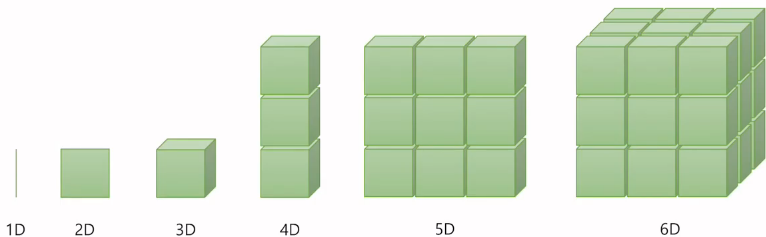

- 스칼라(scalar): 차원이 없는 값
- 벡터(vector): 1차원으로 구성된 값
- 행렬(Matrix): 2차원으로 구성된 값
- 텐서(Tensor): 3차원으로 구성된 값

- 보통 3차원 이상을 텐서라고 하지만 1차원 벡터나 2차원 행렬의 경우도 1차원 텐서, 2차원 텐서로 표현하기도 함

### Tensor with numpy

In [3]:
import numpy as np

t = np.array([0, 1, 2, 3, 4, 5, 6])
print(t)

[0 1 2 3 4 5 6]


In [4]:
print(f"텐서의 차원: {t.ndim}")
print(f"텐서의 크기: {t.shape}")

텐서의 차원: 1
텐서의 크기: (7,)


- numpy는 리스트를 통해 array를 만들어 tensor를 생성할 수 있다

### Tensor with PyTorch

In [5]:
import torch

In [6]:
t = torch.FloatTensor([0, 1, 2, 3, 4, 5, 6])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [7]:
print(f"텐서의 차원: {t.dim()}")
print(f"텐서의 크기: {t.shape}")
print(f"텐서의 크기: {t.size()}")

텐서의 차원: 1
텐서의 크기: torch.Size([7])
텐서의 크기: torch.Size([7])


- 파이토치에서 사용하는 차원, 크기 함수 외에도 numpy에 내장되어 있던 함수를 통해서 확인 가능하다

#### 브로드캐스팅

행렬의 덧셈과 뺄셈을 하기 위해서는 두 행렬의 크기가 맞아야하고 곱셈을 하기 위해서는 일정 차원이 맞아야 한다. 

그러나 불가피하게 크기가 맞지 않는 행렬이나 텐서에 대해 연산을 수행할 필요가 생긴다. 이를 위해 파이토치에서는 자동으로 크기를 맞춰서 연산을 수행하는 **브로드캐스팅** 기능을 제공한다.

In [8]:
m1 = torch.FloatTensor([[3, 3]])
m2 = torch.FloatTensor([[2, 2]])
print(m1 + m2)

tensor([[5., 5.]])


둘의 크기가 같으므로 연산하는 데 문제가 없다

In [9]:
m1 = torch.FloatTensor([[3, 3]])
m2 = torch.FloatTensor([2])
print(m1 + m2)

tensor([[5., 5.]])


둘의 크기가 다르기 때문에 연산하는데 문제가 있지만 크기를 맞춰서 수행하는 것을 볼 수 있다

브로드캐스팅은 딥러닝 연산 과정에서 크기가 다른 텐서 간의 연산을 자동으로 수행해주기 때문에 편리하지만 사용자가 의도한 내용과 다르게 적용될 수 있기 때문에 주의가 필요하다

#### 자주 사용되는 기능들

- 행렬 곱셈과 원소 곱셈

    - 행렬 곱셈: 일반적으로 알고 있는 행렬의 곱셈 연산으로, 행렬 A, B에 대해 A x B 연산을 수행하려면 A의 마지막 차원과 B의 첫번째 차원의 크기가 일치해야한다. 
    A의 크기가 (2, 2)이고 B의 크기가 (2, 1)이라면 행렬의 곱셈을 수행하고 난 후의 결과는 크기가 (2, 1)인 행렬이다

    - 원소 곱셈: 행렬의 각 원소에 대한 곱셈으로, 같은 자리에 있는 원소끼리 곱셈을 수행한다. 아래의 경우 크기가 맞지 않아 m2 행렬에 대해 브로드캐스팅이 수행된 후 원소 곱셈이 수행되었다.

In [10]:
# 행렬의 곱셈
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print(m1.matmul(m2))

# 원소 곱셈
print(m1 * m2)

tensor([[ 5.],
        [11.]])
tensor([[1., 2.],
        [6., 8.]])


- 평균

In [11]:
t = torch.FloatTensor([1, 2])
print(t.mean())

tensor(1.5000)


In [12]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t.mean())

tensor(2.5000)


n차원 텐서의 모든 원소에 대한 평균을 구하고자 할 경우에는 mean()을 사용하면 된다.

In [13]:
t = torch.FloatTensor([[1, 2], [3, 4], [5, 6]])
print(t.size())
print(t.mean(dim=0))
print(t.mean(dim=1))

torch.Size([3, 2])
tensor([3., 4.])
tensor([1.5000, 3.5000, 5.5000])


mean 함수에 dim 인자를 주는 경우 차원에 대한 평균 연산을 수행한다. dim 값은 해당 차원을 줄인다는 의미로 (3, 2)크기의 텐서에 대해 dim=0을 수행하면 첫번째 차원의 크기가 사라지고 (1, 2)크기의 평균 텐서가 나오게 된다. 

- 덧셈

In [14]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [15]:
print(t.sum())
print(t.sum(dim=0))

tensor(10.)
tensor([4., 6.])


- 최대와 최대 인덱스

In [16]:
t = torch.FloatTensor([[1, 4], [2, 3]])
print(t)

tensor([[1., 4.],
        [2., 3.]])


In [17]:
print(t.max())
print(t.max(dim=0))

tensor(4.)
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 0]))


max에 dim인자값을 주면 argmax도 함께 리턴하기 때문에 indices 텐서도 같이 리턴되었다

max나 argmax만 리턴받고 싶다면 리턴값에 인덱스를 부여하여 받으면 된다

In [18]:
max_t, argmax_t = t.max(dim=0)[0], t.max(dim=0)[1]
print("max: ", max_t)
print("argmax: ", argmax_t)

max:  tensor([2., 4.])
argmax:  tensor([1, 0])


- 뷰

파이토치의 뷰(View)는 넘파이의 reshape와 같은 역할을 수행

In [19]:
t = np.array([[[0, 1, 2],
               [3, 4, 5]],
              [[6, 7, 8],
               [9, 10, 11]]])
t.shape

(2, 2, 3)

In [20]:
ft = torch.FloatTensor(t)
print(ft.size())

torch.Size([2, 2, 3])


3차원 텐서에서 2차원 텐서로 변경

In [22]:
print(ft.view([-1, 3]))
print(ft.view([-1, 3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


view([-1, 3])의 의미는 2차원의 크기를 3으로 설정하고 1차원은 파이토치가 자동으로 설정해주는 값을 따르겠다는 의미로 사용자가 잘 모를 때 사용할 수 있다

In [24]:
print(ft.view([-1, 1, 3]))
print(ft.view([-1, 1, 3]).size())

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


- 스퀴즈

스퀴즈는 차원이 1인 차원을 제거

In [25]:
ft = torch.FloatTensor([[0], [1], [2]])
ft.size()

torch.Size([3, 1])

In [27]:
print(ft.squeeze())
print(ft.squeeze().size())

tensor([0., 1., 2.])
torch.Size([3])


In [29]:
ft = torch.FloatTensor([[[[[1, 2, 3]],
                        [[1, 2, 3]],
                        [[1, 2, 3]]]],
                        [[[[1, 2, 3]],
                        [[1, 2, 3]],
                        [[1, 2, 3]]]],
                        [[[[1, 2, 3]],
                        [[1, 2, 3]],
                        [[1, 2, 3]]]]])
print(ft.size())

torch.Size([3, 1, 3, 1, 3])


In [31]:
print(ft.squeeze())
print(ft.squeeze().size())

tensor([[[1., 2., 3.],
         [1., 2., 3.],
         [1., 2., 3.]],

        [[1., 2., 3.],
         [1., 2., 3.],
         [1., 2., 3.]],

        [[1., 2., 3.],
         [1., 2., 3.],
         [1., 2., 3.]]])
torch.Size([3, 3, 3])


중간 중간에 존재하는 크기가 1인 차원 모두 제거해준다

- 언스퀴즈

스퀴즈와 반대되는 개념으로 특정 위치에 크기가 1인 차원을 추가한다

In [32]:
ft = torch.Tensor([0, 1, 2])
print(ft.shape)

torch.Size([3])


In [39]:
print(ft.unsqueeze(1))
print(ft.unsqueeze(1).size())

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


인덱스 0부터 1차원을 의미하고 해당 차원에 크기가 1인 차원을 추가한다.
위의 코드는 인덱스 1을 지정했으므로 2차원에 크기가 1인 차원을 추가했고 크기가 (3,) 에서 (3, 1)이 되었다

- 타입 캐스팅

텐서에는 자료형이 존재한다. 위에서 많이 사용했던 torch.FloatTensor는 32비트 부동 소수점 자료형을 사용하고 torch.LongTensor는 64비트의 부호 있는 정수 자료형을 사용한다. 그 외에도 GPU 연산을 위한 torch.cuda.FloatTensor 와 같은 자료형도 존재한다.

이러한 자료형을 변환하는 과정을 타입 캐스팅이라고 한다.

In [40]:
lt = torch.LongTensor([1, 2, 3, 4])
print(lt)

tensor([1, 2, 3, 4])


In [45]:
print(lt.float())

tensor([1., 2., 3., 4.])


텐서에 `.float()`를 붙이면 float형으로 타입 캐스팅된다. 그 외에도 `long()`, `byte()` 등을 통해 각각 long 타입, byte 타입으로 타입 변환을 수행할 수 있다

- 연결

두 텐서를 연결

In [47]:
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])
print(f'Shape of x: {x.size()}')
print(f'Shape of y: {y.size()}')
print(torch.cat([x, y]).size())

Shape of x: torch.Size([2, 2])
Shape of y: torch.Size([2, 2])
torch.Size([4, 2])


두 가지 텐서를 연결할 때 dim 인자를 주어서 방법을 다르게 연결할 수 있다

In [48]:
print(torch.cat([x, y], dim=0))
print(torch.cat([x, y], dim=1))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


In [50]:
x = torch.FloatTensor([[[1, 2, 3], [4, 5, 6]]])
y = torch.FloatTensor([[[7, 8, 9], [10, 11, 12]]])
print(f'Shape of x: {x.size()}')
print(f'Shape of y: {y.size()}')

Shape of x: torch.Size([1, 2, 3])
Shape of y: torch.Size([1, 2, 3])


In [53]:
print(torch.cat([x, y], dim=0).size())
print(torch.cat([x, y], dim=1).size())
print(torch.cat([x, y], dim=2).size())

torch.Size([2, 2, 3])
torch.Size([1, 4, 3])
torch.Size([1, 2, 6])


해당 차원의 크기가 합쳐짐을 알 수 있다. 따라서 dim 인자의 인덱스에 해당하는 차원의 크기가 증가한다고 생각하면 된다.

- stacking

연결하는 방법에는 cat 외에도 stacking 방법이 존재한다. 스택킹이 많은 연산을 포함하고 있기 때문에 연결하는 것보다 스택킹이 더 편리할 때가 있다.

In [56]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])
print(x.size())

torch.Size([2])


In [57]:
print(torch.stack([x, y, z]))
print(torch.stack([x, y, z]).size())

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
torch.Size([3, 2])


x, y, z 텐서가 차례대로 쌓여서 크기가 (3, 2)인 텐서가 되었다. 이를 cat(연결)으로 구현하려면 차원을 증가시켜준 후 연결해야한다

In [58]:
torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)])

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])

stacking도 dim 인자를 통해 차원에 따라 다르게 연산할 수 있다.

In [59]:
torch.stack([x, y, z], dim=1)

tensor([[1., 2., 3.],
        [4., 5., 6.]])

위의 cat 함수와 같이 인덱스에 해당하는 차원이 증가하도록 stacking 연산을 수행한다

- ones_like 와 zeros_like

원소들이 모두 0으로 구성된 텐서와 1로 구성된 텐서를 만들 수 있다

In [60]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [61]:
print(torch.ones_like(x))

tensor([[1., 1., 1.],
        [1., 1., 1.]])


인자로 텐서를 주면 그 텐서와 크기가 같지만 원소는 모두 1로 구성된 텐서를 생성한다

In [63]:
print(torch.zeros_like(x))

tensor([[0., 0., 0.],
        [0., 0., 0.]])


인자로 텐서를 주면 그 텐서와 크기가 같지만 원소는 모두 0으로 구성된 텐서를 생성한다

- 덮어쓰기

In [64]:
x = torch.FloatTensor([[1, 2], [3, 4]])

In [66]:
print(x.mul(2))
print(x)

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])


mul 함수에 2라는 값을 줘서 각 원소에 2를 곱한 결과를 보여주지만 원본 텐서 x는 수정되지 않는다. 이를 변경하고 싶은 경우 연산 뒤에 _(under bar)를 붙여서 기존의 텐서에 덮어쓰기 할 수 있다.

In [67]:
print(x.mul_(2))
print(x)

tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])
